In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, StandardScaler
import joblib
from sklearn.linear_model import LogisticRegression

In [3]:
dataset = []

In [4]:
# List of folder paths
folder_paths = [
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_6",
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_braeburn_1",
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_crimson_snow_1",
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1",
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_2",
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_3",
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_granny_smith_1",
    "C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Training/apple_hit_1"
]


In [5]:
import os
import cv2

# Iterate over the folder paths
for i in folder_paths:
    folder_name = os.path.basename(i)

    # Iterate over the images in the subdirectory
    for file_name in os.listdir(i):
        image_path = os.path.join(i, file_name)

        if os.path.isfile(image_path):  # Only consider files
            # Load the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # If the image was successfully loaded
            if image is not None:
                # Resize the grayscale image to 250X250 pixels
                resized_image = cv2.resize(image, (250, 250))

                # Flatten the image and append each pixel as a separate feature along with the label to the dataset
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])


In [6]:
"""Convert the dataset to a pandas DataFrame"""
df = pd.DataFrame(dataset, columns=[f'pixel_{i+1}' for i in range(250*250)] + ['label'])
"""Print the DataFrame"""
df

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_62492,pixel_62493,pixel_62494,pixel_62495,pixel_62496,pixel_62497,pixel_62498,pixel_62499,pixel_62500,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1
2669,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1
2670,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1
2671,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1


In [7]:
# Extract the last column (label column) from the DataFrame
label_column = df.iloc[:, -1]
# Count the occurrences of each unique label

In [8]:
label_counts = label_column.value_counts()
label_counts

apple_hit_1             468
apple_braeburn_1        320
apple_granny_smith_1    320
apple_crimson_snow_1    318
apple_golden_3          316
apple_6                 315
apple_golden_1          308
apple_golden_2          308
Name: label, dtype: int64

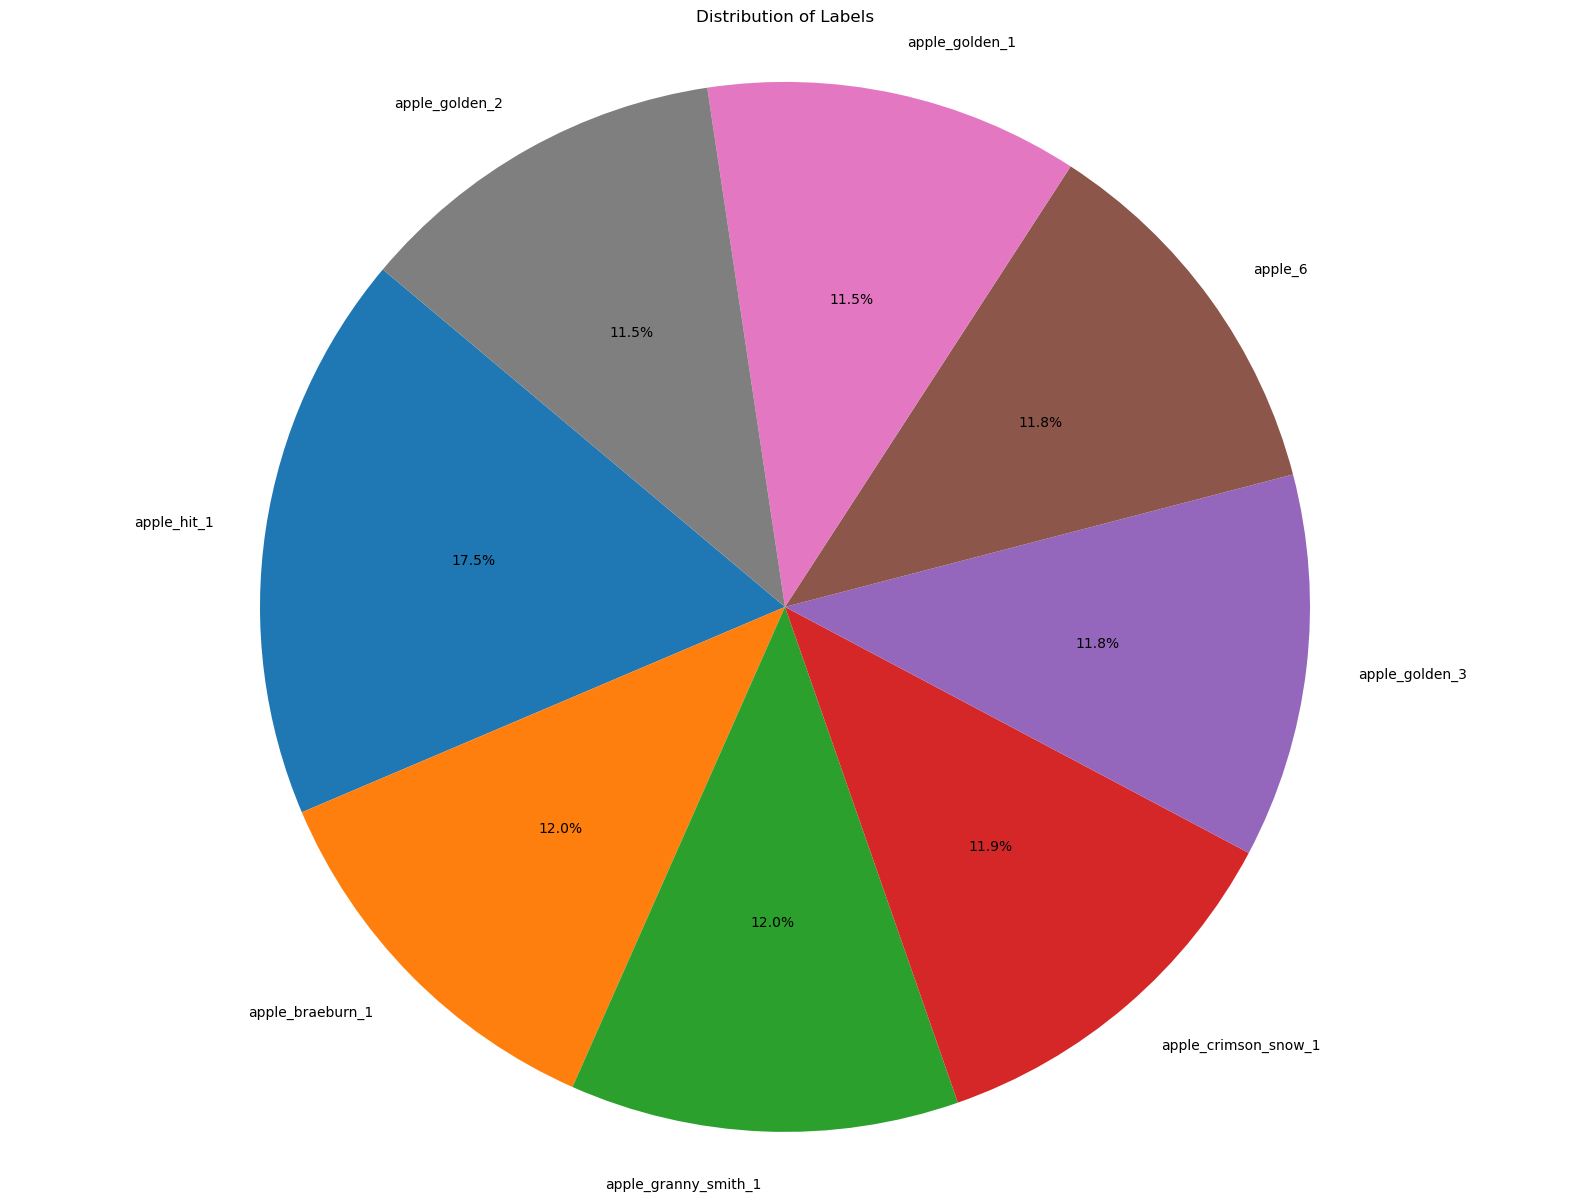

In [9]:
# Create a pie chart
plt.figure(figsize=(20, 15))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Labels')
plt.show()

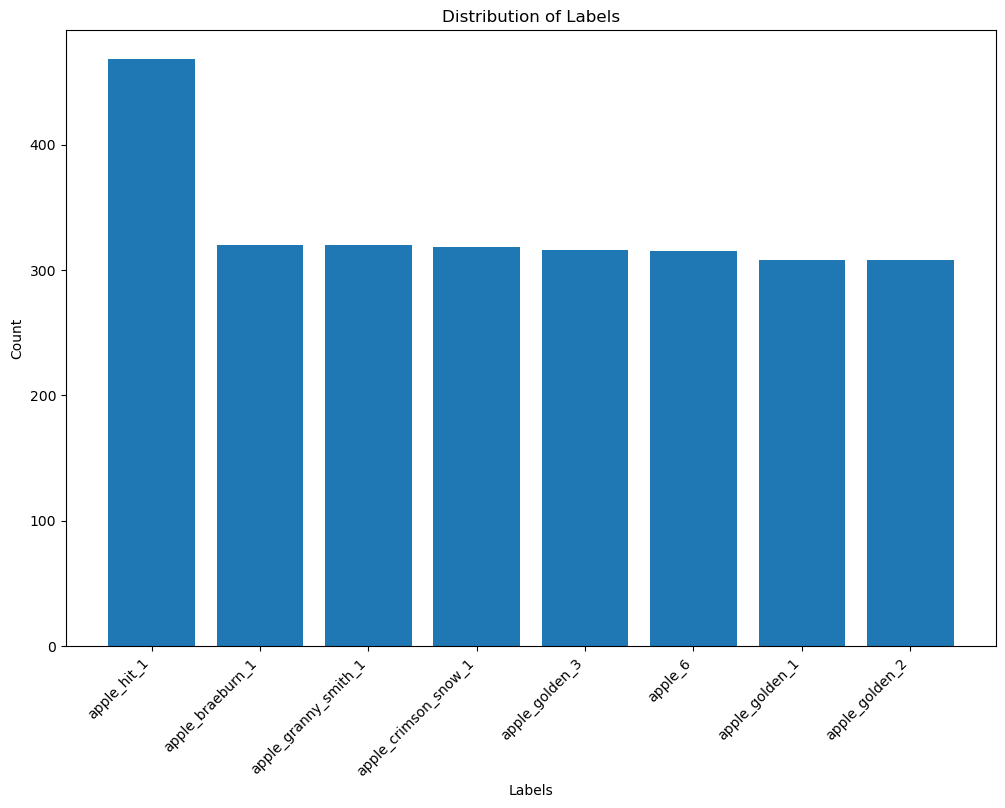

In [10]:
# Create a bar chart
plt.figure(figsize=(12, 8)) 
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45, ha='right')  
plt.show()

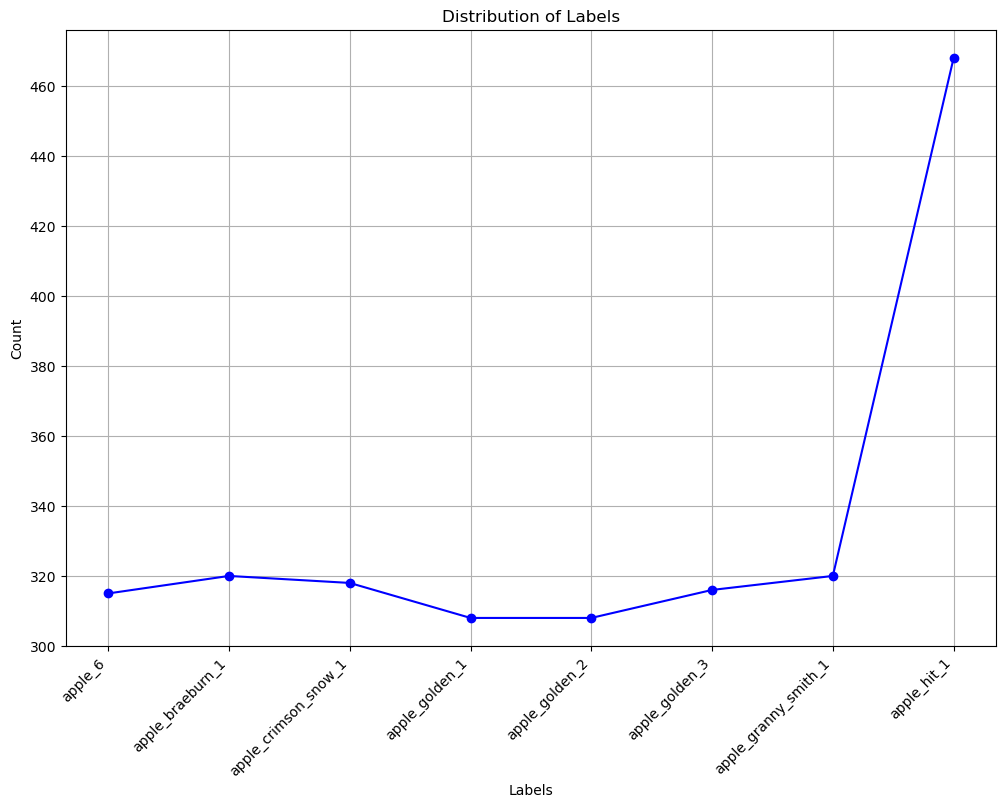

In [11]:
"""Sort the label counts by index (labels) for a more organized line graph"""
label_counts_sorted = label_counts.sort_index()
"""Create a line graph"""
"""Increase width to 12 inches and height to 8 inches"""
plt.figure(figsize=(12, 8))  
plt.plot(label_counts_sorted.index, label_counts_sorted.values, marker='o', linestyle='-', color='b')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
"""Rotate x-axis labels for better visibility"""
plt.xticks(rotation=45, ha='right')  
"""Add grid lines for better visualization"""
plt.grid(True)  
plt.show()

In [12]:
df

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_62492,pixel_62493,pixel_62494,pixel_62495,pixel_62496,pixel_62497,pixel_62498,pixel_62499,pixel_62500,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1
2669,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1
2670,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1
2671,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_hit_1


In [13]:
# "Normalize the pixel values between 0 and 1"
# X=df.iloc[:,:62500]
# X=X/255
# X


In [14]:
# Y=df.iloc[:,-1]
# Y

In [15]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# # Fit and transform the labels into numeric values
# Y_encoded = label_encoder.fit_transform(Y)


In [16]:
# y_series = pd.Series(Y_encoded, name='Target')

# # Concatenate 'X' (features) and 'y_series' (target variable) along columns (axis=1)
# df = pd.concat([X, y_series], axis=1)

# # Print the merged DataFrame to check the result
# df

In [17]:
# from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y_series, test_size=0.2, random_state=42)

In [18]:
# from sklearn.svm import SVC

# # Create an SVM classifier
# svm_classifier = SVC(kernel='linear', C=1.0)

# # Train the SVM classifier
# svm_classifier.fit(X_train, y_train)


In [52]:
y=df[['label']]
x = df.drop('label', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
p1 = Pipeline(steps=[('scaler', StandardScaler()),('logistics', LogisticRegression())])
p1.fit(x,y)
y_pred = p1.predict(x_test)

E:\Anaconda 1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda 1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
joblib.dump(p1,'model_fruits.pkl')

['model_fruits.pkl']

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
                      precision    recall  f1-score   support

             apple_6       1.00      1.00      1.00        62
    apple_braeburn_1       1.00      1.00      1.00        70
apple_crimson_snow_1       1.00      1.00      1.00        55
      apple_golden_1       1.00      1.00      1.00        63
      apple_golden_2       1.00      1.00      1.00        61
      apple_golden_3       1.00      1.00      1.00        61
apple_granny_smith_1       1.00      1.00      1.00        68
         apple_hit_1       1.00      1.00      1.00        95

            accuracy                           1.00       535
           macro avg       1.00      1.00      1.00       535
        weighted avg       1.00      1.00      1.00       535

Confusion Matrix:
[[62  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0]
 [ 0  0  0  0 61  0  0  0]
 [ 0  0  0  0  0 61  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 95]]


In [55]:
import cv2
import pandas as pd
img=cv2.imread('C:/Users/User/Desktop/fruits_360/fruits-360-original-size/fruits-360-original-size/Test/apple_braeburn_1/r0_15.jpg',cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img,(250,250))
img_1d=img.flatten()
img_reshaped = img_1d.reshape(1, -1)
print(img_reshaped)

data = pd.DataFrame(img_reshaped, columns=[f'pixel_{i+1}' for i in range(250*250)] )
# data = pd.DataFrame(img_1d)

data

[[255 255 255 ... 255 255 255]]


,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_62491,pixel_62492,pixel_62493,pixel_62494,pixel_62495,pixel_62496,pixel_62497,pixel_62498,pixel_62499,pixel_62500
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [57]:
pipeline = joblib.load('model_fruits.pkl')
pdata = pipeline['scaler'].transform(data)
pc = pipeline['logistics'].predict(pdata)
print("Prediction: ",pc[0])

Prediction:  apple_braeburn_1
